In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Resolution Change Count-data-2021-11-17 14_27_21_processed.csv')
dataset

,Time,Resolution Change Count
0,1,34
1,2,41
2,3,50
3,4,40
4,5,38
...,...,...
715,716,30
716,717,25
717,718,25
718,719,33


In [5]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [6]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

482 238


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
480/480 - 12s - loss: 0.0644 - 12s/epoch - 25ms/step
Epoch 2/100
480/480 - 2s - loss: 0.0227 - 2s/epoch - 4ms/step
Epoch 3/100
480/480 - 2s - loss: 0.0115 - 2s/epoch - 4ms/step
Epoch 4/100
480/480 - 2s - loss: 0.0033 - 2s/epoch - 4ms/step
Epoch 5/100
480/480 - 2s - loss: 3.6570e-04 - 2s/epoch - 3ms/step
Epoch 6/100
480/480 - 2s - loss: 3.9690e-05 - 2s/epoch - 3ms/step
Epoch 7/100
480/480 - 2s - loss: 2.8757e-05 - 2s/epoch - 3ms/step
Epoch 8/100
480/480 - 2s - loss: 2.5792e-05 - 2s/epoch - 3ms/step
Epoch 9/100
480/480 - 2s - loss: 2.2685e-05 - 2s/epoch - 4ms/step
Epoch 10/100
480/480 - 2s - loss: 2.0025e-05 - 2s/epoch - 4ms/step
Epoch 11/100
480/480 - 2s - loss: 1.7220e-05 - 2s/epoch - 4ms/step
Epoch 12/100
480/480 - 2s - loss: 1.5848e-05 - 2s/epoch - 4ms/step
Epoch 13/100
480/480 - 2s - loss: 1.3908e-05 - 2s/epoch - 4ms/step
Epoch 14/100
480/480 - 2s - loss: 1.3524e-05 - 2s/epoch - 3ms/step
Epoch 15/100
480/480 - 2s - loss: 1.3107e-05 - 2s/epoch - 4ms/step
Epoch 16/100
480/

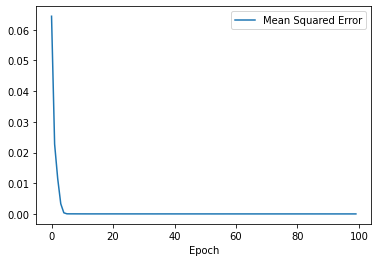

In [18]:
import numpy as np
from keras.callbacks import History
plt.figure()
plt.xlabel('Epoch')
plt.plot(history.epoch, np.array(history.history['loss']),label='Mean Squared Error')
plt.legend()
plt.show()